In [2]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [139]:
canada = pd.read_csv('datasets/CAvideos.csv')
germany = pd.read_csv('datasets/DEvideos.csv')
france = pd.read_csv('datasets/FRvideos.csv')
uk = pd.read_csv('datasets/GBvideos.csv')
india = pd.read_csv('datasets/INvideos.csv')
japan = pd.read_csv('datasets/JPvideos.csv', engine='python')
korea = pd.read_csv('datasets/KRvideos.csv', engine='python')
mexico = pd.read_csv('datasets/MXvideos.csv', engine='python')
russia = pd.read_csv('datasets/RUvideos.csv', engine='python')
us = pd.read_csv('datasets/USvideos.csv')

In [4]:
#Function that reads json file and returns dictionary with category id as key and category title as value
def read_json_files(filename):
    json = pd.read_json(filename)
    Dict = {}
    for item in json['items']: 

        category_id = item['id']
        category = item['snippet']['title']
        Dict[category_id] = category
        
    #check if category id 29 exists in dict - for some regions this id is missing in the json file for some reason
    if not('29' in Dict):
        Dict['29'] = 'Nonprofits & Activism'
        
    return Dict


In [5]:
def clean_data(df, json_file):

    df_clean = df.copy()
    df_clean = df_clean.drop(['thumbnail_link'], axis=1)

    #change the type of date columns from object to datetime64[ns] to be able to change the formatting
    #publish time - timezone is UTC - coordinated universal time
    df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], format = '%y.%d.%m')
    df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%f%z')

    #change the formatting of date columns
    df_clean['trending_date'] = df_clean['trending_date'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
    df_clean['publish_time'] = df_clean['publish_time'].dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    #cleaning up tags column
    #replaces |" (first tag is not enclosed with "") and "|" with ',' and removes last trailing character "
    df_clean['tags'] = df_clean['tags'].replace(to_replace='"\|"|\|"',value=',', regex=True).str.rstrip('"')
    
    #replace the value [none] in tags column with NaN
    df_clean['tags'].replace('[none]', np.nan, inplace=True)
    
    #replace value 'Deleted video' in title column with NaN
    df_clean['title'].replace('Deleted video', np.nan, inplace=True)
    
    #create dictionary of category id's and values
    category_dict = read_json_files(json_file)

    #change category_id type to string and rename column
    df_clean['category_id'] = df_clean['category_id'].astype(str)
    df_clean = df_clean.rename(columns={'category_id':'category'})

    #replace id's with category name
    df_clean['category'] = df_clean['category'].apply(category_dict.get)
    
    return df_clean



In [140]:
canada_clean = clean_data(canada, 'datasets/CA_category_id.json')
germany_clean = clean_data(germany, 'datasets/DE_category_id.json')
france_clean = clean_data(france, 'datasets/FR_category_id.json')
uk_clean = clean_data(uk, 'datasets/GB_category_id.json')
india_clean = clean_data(india, 'datasets/IN_category_id.json')
japan_clean = clean_data(japan, 'datasets/JP_category_id.json')
korea_clean = clean_data(korea, 'datasets/KR_category_id.json')
mexico_clean = clean_data(mexico, 'datasets/MX_category_id.json')
russia_clean = clean_data(russia, 'datasets/RU_category_id.json')
us_clean = clean_data(us, 'datasets/US_category_id.json')


In [142]:
#canada_clean.head()
#germany_clean.head()
#france_clean.head()
#uk_clean.head()
#india_clean.head()
#japan_clean.head()
#korea_clean.head()
#mexico_clean.head()
#russia_clean.head()
#us_clean.head()

In [110]:
ca = canada_clean.copy()
ca['country'] = 'Canada'

de = germany_clean.copy()
de['country'] = 'Germany'

fr = france_clean.copy()
fr['country'] = 'France'

gb = uk_clean.copy()
gb['country'] = 'Great Britain'

ind = india_clean.copy()
ind['country'] = 'India'

jp = japan_clean.copy()
jp['country'] = 'Japan'

kr = korea_clean.copy()
kr['country'] = 'Korea'

mx = mexico_clean.copy()
mx['country'] = 'Mexico'

ru = russia_clean.copy()
ru['country'] = 'Russia'

usa = us_clean.copy()
usa['country'] = 'USA'

all_data = pd.concat([ca, de, fr, gb, ind, jp, kr, mx, ru, usa])
all_data.reset_index(drop=True, inplace=True)

#check videos where video id = #VALUE!
all_data[all_data['video_id'] == '#VALUE!']

idx1 = [182059, 182255, 182473, 182710]
idx2 = [183801, 184007, 184282]

#Replace the id of same videos with AA or BB - these id's are not present in the dataset
for i in range(len(idx1)):
    all_data.loc[idx1[i], 'video_id'] = 'AA'
    
for i in range(len(idx2)):
    all_data.loc[idx2[i], 'video_id'] = 'BB'
    
all_data[all_data['video_id'] == '#VALUE!']


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
182059,#VALUE!,2018-03-09,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",68027,4963,169,477,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182255,#VALUE!,2018-03-10,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",143872,6914,297,540,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182473,#VALUE!,2018-03-11,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",233118,8381,400,624,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182710,#VALUE!,2018-03-12,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",258163,8991,430,640,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
183801,#VALUE!,2018-03-19,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",111087,3513,65,183,False,False,False,Watch the official teaser of upcoming Marathi ...,India
184007,#VALUE!,2018-03-20,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",156320,4299,93,230,False,False,False,Watch the official teaser of upcoming Marathi ...,India
184282,#VALUE!,2018-03-21,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",206364,4930,111,252,False,False,False,Watch the official teaser of upcoming Marathi ...,India


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country


In [115]:
#Find all videos where video_id is #NAME?, find which of these videos are the same videos (by comparing channel title 
#and published time) and replace them with custom id

#Video-id is not important in itself, important thing is to separate unique videos

id_counter = 1

#.copy() is necessary to avoid SettingwithCopyWarning error
data_to_correct = all_data[all_data.video_id == '#NAME?'].copy()
    

while not data_to_correct.empty:
    #take the first item from data_to_correct, find indexes where the channel and published time is the same as in the first video
    idx = data_to_correct.index[(data_to_correct['channel_title'] == data_to_correct.iloc[0].channel_title) & (data_to_correct['publish_time'] == data_to_correct.iloc[0].publish_time)]
  
    #replace video_id in original data with generated id
    #delete the row from data_to_correct
    for i in range(len(idx)):
        all_data.loc[idx[i], 'video_id'] = str(id_counter)
        data_to_correct.drop(idx[i], inplace=True)
        
    #when we have replaced the id of the same videos, we can increase the id
    id_counter += 1
        

In [129]:
#check newly created id-s

#pd.set_option('display.max_rows', 2320)
#all_data[all_data['video_id'].apply(lambda x: len(x)<11)].sort_values('video_id')
pd.set_option('display.max_rows', 50)

In [130]:
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# Set the default style
plt.style.use("ggplot")

In [131]:
sorted_data = all_data.sort_values(by=["title", "trending_date"])
sorted_data["time_to_trending"] = sorted_data.trending_date.dt.date - sorted_data.publish_time.dt.date
# This is a bit of a hack so that we could find the maximum and minimum time between trending_date and publish time in the next step
sorted_data["trending_time"] = sorted_data.trending_date.dt.date - sorted_data.publish_time.dt.date

In [132]:
# Group videos by titles (find unique videos) and create a dataframe of results
# There are two trending times: max and min difference between trending_date and publish_time
unique_videos = sorted_data.groupby(["video_id", "title", "channel_title", "category", "publish_time", "country"], as_index=False).agg({"trending_date": min, "time_to_trending": min, "trending_time": max})

# Difference between max and min trending time is how long the video was in the trending page
# Add 1 day to all trending durations (if the video was trending on 2 days, then trending time will be 2 instead of 1)
unique_videos["trending_time"] = unique_videos["trending_time"] - unique_videos["time_to_trending"] + pd.Timedelta("1 day")

In [133]:
# Since this gives more than 10 (nr of countries) rows for some video ids, then some additional grouping must be done.
# See videos with video ids below for more info
unique_videos.video_id.value_counts()

FeRi86DcfyA    16
qUmfriZoMw0    13
tjA7nAHOAww    12
Jz50eTT6y8g    11
4xTpw-05J0k    11
elwTgpHlty0    10
XiHiW4N7-bo    10
pVxOVlm_lE8    10
_y2-Aj53sxw    10
ogfYd705cRs    10
OrnpSe4OChM    10
iWZmdoY1aTE    10
_I_D_8Z4sJE    10
DkeiKbqa02g    10
u9Mv98Gr5pY    10
9_LIP7qguYw    10
g4Hbz2jLxvQ    10
tCXGJQYZ9JA    10
uBYzYji4rmE     9
3N3c3ZX6hoM     9
NooW_RbfdWI     9
iN8zmmCRqUA     9
VY1eFxgRR-k     9
D_6QmL6rExk     9
FlsCjmMhFmw     9
               ..
rF_mBgxE95Y     1
HR5g5DNcq1g     1
3JTkf7VzX_c     1
D61yPDBFnlo     1
fdAEm7GbEVI     1
6K8-hu-Kv-E     1
HCnwgvSs0vA     1
rDmSMMaIooY     1
eygDSQF_BQQ     1
pY0EmHGQ2zg     1
VmLRyj7pRX0     1
ptapTZeVSzI     1
wvFxuMbnj1U     1
KAha5roQXIA     1
jfdm1JqwHm0     1
CQKfx5NOsVM     1
icfeqYAZJQU     1
3ZnMxabk510     1
3pD4PD66y-Y     1
B0i0CZb3ujw     1
f5D7hgtHdmc     1
syuOPe7e1d0     1
vQkXrct78A4     1
DsbAFLlMwYo     1
841FEGJ0WnQ     1
Name: video_id, Length: 185754, dtype: int64

In [134]:
# Do some additional grouping to account for the fact that some videos had changed titles/categories or had been published multiple times
unique_videos = unique_videos.groupby(["video_id", "channel_title", "country"], as_index=False).agg({"title": "first", "publish_time": "first", "category": "last", "trending_date": min, "time_to_trending": min, "trending_time": max})
unique_videos.video_id.value_counts()

tjA7nAHOAww    10
OrnpSe4OChM    10
iWZmdoY1aTE    10
tCXGJQYZ9JA    10
XiHiW4N7-bo    10
DkeiKbqa02g    10
pVxOVlm_lE8    10
u9Mv98Gr5pY    10
g4Hbz2jLxvQ    10
aj8mN_7Apcw     9
dzxFdtWmjto     9
FlsCjmMhFmw     9
tlILlcCE8Sc     9
cSp1dM2Vj48     9
YBpdL9hSac4     9
M4ZoCHID9GI     9
elwTgpHlty0     9
QwievZ1Tx-8     9
aJOTlE1K90k     9
MFWF9dU5Zc0     9
VY1eFxgRR-k     9
p8npDG2ulKQ     9
WS7f5xpGYn8     9
7C2z4GqqS5E     9
ad_higXixRA     9
               ..
faqmUChncag     1
yFp2jZFVv5c     1
3NzFgSlt0a0     1
3sPmrXdNoew     1
8MfCjooa_cU     1
Qh7yS1vHlrI     1
XECpMXKGyfQ     1
1qBNXl-klWQ     1
gsweYWCtvgU     1
RjujNLl1jyk     1
glo8yoU-NP8     1
SiDjAFVOkF8     1
6iwRc8_1qJc     1
0cGIAXRDxHg     1
pddGdBA9U0g     1
ZgsjkL8PKM8     1
_4ouRnTRJRQ     1
ZzSkpyJhOTA     1
kKrbNAwkew0     1
WAhgxhppeEk     1
IiOi_-53VQI     1
BosziPS2BuY     1
nA4CmdvI7wg     1
SwjKQWUkTPo     1
841FEGJ0WnQ     1
Name: video_id, Length: 185754, dtype: int64

In [135]:
unique_videos.trending_time.value_counts()

1 days     144524
2 days      38001
3 days      12681
4 days       4913
5 days       2418
6 days       1265
7 days        959
8 days        533
9 days        420
11 days       367
12 days       341
13 days       334
10 days       330
14 days       280
15 days       175
16 days       128
17 days       120
18 days        99
20 days        95
19 days        83
21 days        74
36 days        73
22 days        62
23 days        54
28 days        49
24 days        48
25 days        45
37 days        44
27 days        42
35 days        41
26 days        40
29 days        39
30 days        30
34 days        27
31 days        27
32 days        25
33 days        25
38 days         3
Name: trending_time, dtype: int64

In [136]:
print("Average time until a video trends is:", unique_videos.time_to_trending.mean())
print("Median time until a video trends is:", unique_videos.time_to_trending.median())
print("Average time a video stays in trending is:", unique_videos.trending_time.mean())
print("Median time a video stays in trending is:", unique_videos.trending_time.median())

Average time until a video trends is: 3 days 05:49:21.353165
Median time until a video trends is: 1 days 00:00:00
Average time a video stays in trending is: 1 days 18:00:39.514591
Median time a video stays in trending is: 1 days 00:00:00


In [137]:
countries = ["Canada", "Germany", "Great Britain", "France", "USA", "India", "Japan", "Korea", "Mexico", "Russia"]
country_stats = pd.DataFrame({"Country": countries})

,Country,average_time_to_trending,median_time_to_trending,average_time_in_trending,median_time_in_trending
0,Canada,2 days 21:00:15.028239,1 days,1 days 16:01:09.542440,1 days
1,Germany,1 days 13:39:54.816414,1 days,1 days 08:57:57.537796,1 days
2,Great Britain,37 days 01:12:35.420589,2 days,12 days 09:54:16.726389,10 days
3,France,2 days 19:25:50.524767,1 days,1 days 07:50:12.417851,1 days
4,USA,22 days 11:42:20.710468,2 days,6 days 16:56:17.051241,6 days
5,India,1 days 07:24:25.052950,1 days,1 days 23:16:41.464447,2 days
6,Japan,1 days 09:10:15.116811,1 days,1 days 02:46:20.393953,1 days
7,Korea,1 days 23:08:06.004458,1 days,1 days 23:36:32.816447,2 days
8,Mexico,1 days 18:54:01.049191,1 days,1 days 04:26:18.238982,1 days
9,Russia,2 days 05:16:30.704095,1 days,1 days 03:58:09.001380,1 days


C:\Users\eibrus\Anaconda3\lib\site-packages\pandas\plotting\_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


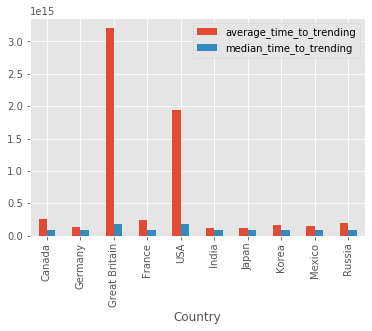

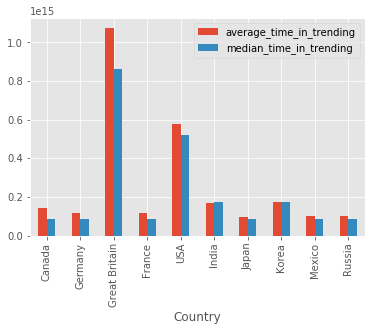

In [138]:
avg_time_to_trending = []
median_time_to_trending = []
avg_time_in_trending = []
median_time_in_trending = []

# For each country in the list of countries (defined above)
for c in countries:
    # Add median time until video makes it to trending by country
    median_time_to_trending.append(unique_videos[unique_videos.country == c].time_to_trending.median())
    avg_time_to_trending.append(unique_videos[unique_videos.country == c].time_to_trending.mean())
    median_time_in_trending.append(unique_videos[unique_videos.country == c].trending_time.median())
    avg_time_in_trending.append(unique_videos[unique_videos.country == c].trending_time.mean())
    
country_stats["average_time_to_trending"] = avg_time_to_trending
country_stats["median_time_to_trending"] = median_time_to_trending
country_stats["average_time_in_trending"] = avg_time_in_trending
country_stats["median_time_in_trending"] = median_time_in_trending
country_stats

# Currently, something is fucked up with the plots, because y-axis values are wrong
country_stats.plot.bar(x="Country", y=["average_time_to_trending", "median_time_to_trending"])
country_stats.plot.bar(x="Country", y=["average_time_in_trending", "median_time_in_trending"])